# DUPLICATE DETECTION

In [51]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import urllib
import cv2
import numpy as np
import umap
from scipy import ndimage, misc
from scipy.linalg import norm
from scipy import sum, average
import matplotlib.image as mpimg
from PIL import Image
from skimage import io
from scipy import misc
warnings.filterwarnings("ignore") 

In [2]:
data = pd.read_csv('2oq-c1r.csv')

In [4]:
data.head()

,productId,title,description,imageUrlStr,mrp,sellingPrice,specialPrice,productUrl,categories,productBrand,...,keySpecsStr,detailedSpecsStr,specificationList,sellerName,sellerAverageRating,sellerNoOfRatings,sellerNoOfReviews,sleeve,neck,idealFor
0,SPWDS7UPDCMEG8WH,Clovia Women's Shapewear,NaN,http://img.fkcdn.com/image/shapewear/8/w/h/sw0...,1199.0,959.0,959.0,http://dl.flipkart.com/dl/clovia-women-s-shape...,Apparels>Women>Lingerie & Sleepwear>Shapewears,Clovia,...,Type: Shapewear;Women's Shapewear;Solid Patter...,Type: Shapewear;Women's Shapewear;Solid Patter...,NaN,Neha Kant,3.6,2123,58,NaN,NaN,NaN
1,SPWDTSM9QHVDHTN6,Clovia Women's Shapewear,NaN,http://img.fkcdn.com/image/shapewear/z/x/w/sw0...,999.0,649.0,616.0,http://dl.flipkart.com/dl/clovia-women-s-shape...,Apparels>Women>Lingerie & Sleepwear>Shapewears,Clovia,...,Type: Thigh Slimmer;Women's Shapewear;Solid Pa...,Type: Thigh Slimmer;Women's Shapewear;Solid Pa...,NaN,Neha Kant,3.6,2123,58,NaN,NaN,NaN
2,SPWDTSMAGMHDNENJ,Clovia Women's Shapewear,NaN,http://img.fkcdn.com/image/shapewear/z/x/w/sw0...,999.0,649.0,616.0,http://dl.flipkart.com/dl/clovia-women-s-shape...,Apparels>Women>Lingerie & Sleepwear>Shapewears,Clovia,...,Type: Thigh Slimmer;Women's Shapewear;Solid Pa...,Type: Thigh Slimmer;Women's Shapewear;Solid Pa...,NaN,Neha Kant,3.6,2123,58,NaN,NaN,NaN
3,SPWDWDT6NQDAHETZ,Triumph Shape 04 PLY Women's Shapewear,NaN,http://img.fkcdn.com/image/shapewear/e/t/z/401...,1899.0,1599.0,1599.0,http://dl.flipkart.com/dl/triumph-shape-04-ply...,Apparels>Women>Lingerie & Sleepwear>Shapewears,Triumph,...,Women's Shapewear;Checkered Pattern;Fabric: 20...,Women's Shapewear;Checkered Pattern;Fabric: 20...,NaN,Satvinder Singh,4.1,245590,2573,NaN,NaN,NaN
4,SPWE4FHG6HUMGBQH,Golden Girl Red Corset Women's Shapewear,NaN,http://img.fkcdn.com/image/shapewear/b/q/h/pan...,1399.0,475.0,475.0,http://dl.flipkart.com/dl/golden-girl-red-cors...,Apparels>Women>Lingerie & Sleepwear>Shapewears,Golden Girl,...,Type: Shapewear;Women's Shapewear;Solid Patter...,Type: Shapewear;Women's Shapewear;Solid Patter...,NaN,AMIT PRAKASH,3.9,379,10,Sleeveless,NaN,NaN


In [5]:
data.columns

Index(['productId', 'title', 'description', 'imageUrlStr', 'mrp',
       'sellingPrice', 'specialPrice', 'productUrl', 'categories',
       'productBrand', 'productFamily', 'inStock', 'codAvailable', 'offers',
       'discount', 'shippingCharges', 'deliveryTime', 'size', 'color',
       'sizeUnit', 'storage', 'displaySize', 'keySpecsStr', 'detailedSpecsStr',
       'specificationList', 'sellerName', 'sellerAverageRating',
       'sellerNoOfRatings', 'sellerNoOfReviews', 'sleeve', 'neck', 'idealFor'],
      dtype='object')

### Finding the number of repeating products using productID's

In [6]:
#  TOTAL NUMBER OF ROWS - NUMBER OF UNIQUE ROWS = NUMBER OF REPEATING ROWS
data.shape[0] - len(data['productId'].unique())

3047

### Finding the number of repeating products using productURL's


In [7]:
#  TOTAL NUMBER OF ROWS - NUMBER OF UNIQUE ROWS = NUMBER OF REPEATING ROWS
data.shape[0] - len(data['productUrl'].unique())

2355

### Number of Unique Product brands

In [8]:
len(data['productBrand'].value_counts())

17023

In [9]:
brandprice = data.groupby('productBrand').sum()
vals = data['productBrand'].value_counts()

### Brand worth = Selling cost of all goods/ Number of goods which is the average cost per good

In [10]:
worth = []
for i in brandprice.index:
    w = brandprice['sellingPrice'][i]/vals[i]
    worth.append(w)
brandprice['Brand_Worth'] = worth

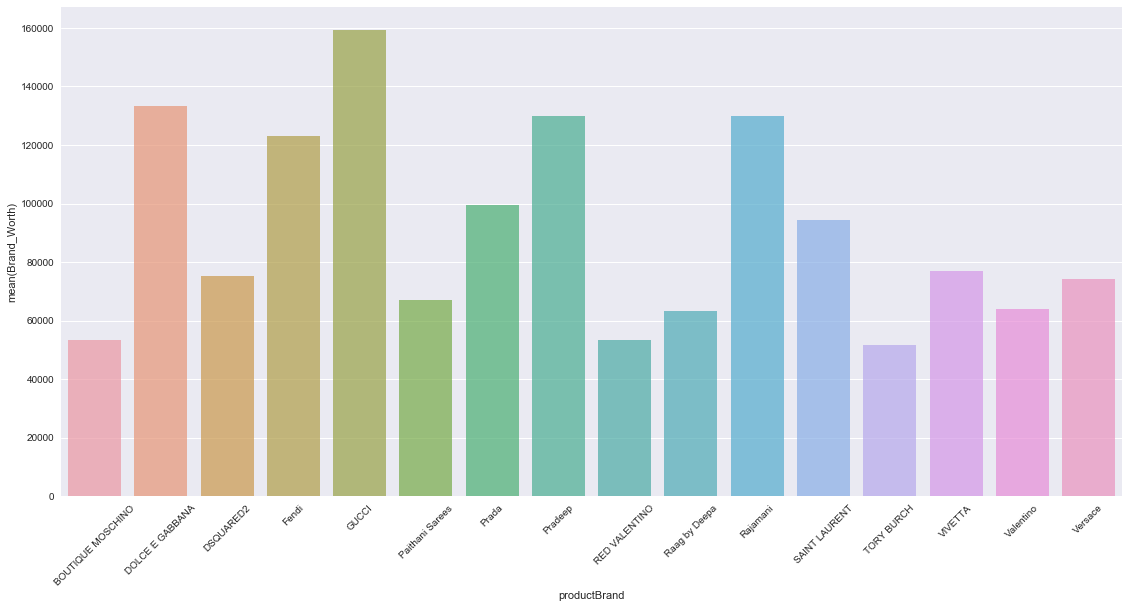

In [11]:
top_brands = brandprice[(brandprice['Brand_Worth'] > 50000)]

plt.figure(figsize=(19,9))
sns.barplot(x=top_brands.index, 
              y='Brand_Worth', 
              data=top_brands, 
              alpha=0.7) 
plt.xticks(rotation=45)
plt.show()

### Gucci seems to be the costliest brand followed by Dolce & Gabbana

In [52]:
urls = data['imageUrlStr'].dropna()
url = [i.split(';')[1] for i in urls]

### Retreiving the images and saving them locally (Non NAN ones)

In [59]:
for i in range(0,len(url)):
    urllib.request.urlretrieve(
        url[i], 
        'Images/{}.jpg'.format(i)
    )

In [5]:
images = []
for i in range(0,1062):
    im = ndimage.imread('Images/{}.jpg'.format(i))
    image_resized = misc.imresize(im, (64, 64))
    normal_image = image_resized/255
    images.append(normal_image)

In [178]:
def compare_images(img1, img2):
    # calculate the difference and its norms
    diff = img1 - img2  # elementwise for scipy arrays
    m_norm = sum(abs(diff))  # Manhattan norm
    z_norm = norm(diff.ravel(), 0)  # Zero norm
    return (m_norm, z_norm)

# NON DUPLICATE IMAGES

In [196]:
compare_images(images[0],images[1])

(3233.4392156862746, 12053.0)

There is a substantial amount of distance between these images (Not duplicates)

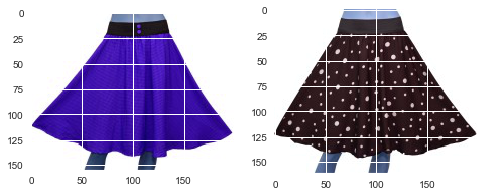

In [212]:
img1 = cv2.imread('Images/1055.jpg')
img2 = cv2.imread('Images/1054.jpg')
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img1)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img2)
plt.show()

# DUPLICATE IMAGES

In [204]:
compare_images(images[1055],images[1056])

(0.0, 0.0)

The distance between the images is 0, so they must be duplicates

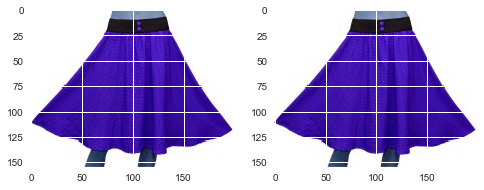

In [45]:
img1 = cv2.imread('Images/1055.jpg')
img2 = cv2.imread('Images/1056.jpg')
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img1)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img2)
plt.show()

In [41]:
im = np.array(images)

In [61]:
imgs = []
for i in range(0,10):
    face = misc.imread('Images/{}.jpg'.format(i));
    f=misc.face(gray=True)
    [width1,height1]=[f.shape[0],f.shape[1]]
    f2=f.reshape(width1*height1)
    imgs.append(f2)

In [62]:
matrix = np.array(imgs)

In [63]:
matrix.shape

(10, 786432)

## Lower Dimensional representation using UMAP

In [64]:
embedding = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(matrix)

In [84]:
df = pd.DataFrame(embedding, columns=('x', 'y'))

In [85]:
df['Image'] = [1,2,2,3,4,4,5,6,7,8]

<Figure size 864x864 with 0 Axes>

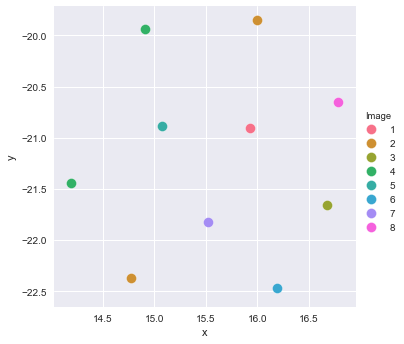

In [86]:
plt.figure(figsize=(12,12))
sns.pairplot(x_vars = ["x"], y_vars = ["y"],data = df, hue = 'Image',
             size=5, plot_kws={"s": 100});
plt.show()